In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Преобразуем собранные данные в DataFrame

In [2]:
df = pd.read_excel('Алкопарсинг1.xlsx')

# Часть 1

## Предобработка полученного DataFrame

In [3]:
df.head()

,Unnamed: 0,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,...,gift_wrap,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container
0,0,"Вино Hito, Bodegas Cepa 21, 2020г.",133241,/catalog/product/bodegas_cepa_21_hito_2020_075...,2690,NaN,NaN,False,Испания,красное,...,False,NaN,Кастилия и Леон,2020.0,14.5,8-10 лет.,Ribera del Duero DO,Denominacion de Origen (DO),аэрация,Бочка
1,1,"Вино Sassi Chiusi, Bertinga, 2017г.",138778,/catalog/product/bertinga_sassi_chiusi_2017_07...,4290,NaN,NaN,False,Италия,красное,...,False,"['Greenselection', 'Органика']",Тоскана,2017.0,14.0,10-15 лет.,Toscana IGT,Indicazione Geografica Tipica (IGT),аэрация,Бочка
2,2,"Вино Tempranillo Art Collection, Gurpegui, 2021г.",137398,/catalog/product/gurpegui_tempranillo_art_coll...,890,NaN,NaN,False,Испания,красное,...,False,NaN,Эстремадура,2021.0,13.0,3-4 года.,Ribera del Guadiana DO,Denominacion de Origen (DO),аэрация,Нейтральная Емкость
3,3,"Вино Priara Pinot Grigio, Pradio, 2021г.",137991,/catalog/product/pradio_priara_pinot_grigio__2...,1990,NaN,NaN,False,Италия,белое,...,False,NaN,Фриули-Венеция-Джулия,2021.0,13.5,2-3 года.,Friuli DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость
4,4,"Вино Tenuta Regaleali Bianco, Tasca d'Almerita...",137078,/catalog/product/conte_tasca_d_almerita_tenuta...,1990,30.0,1393.0,False,Италия,белое,...,False,['GreenselectionSustainable'],Сицилия,2021.0,12.5,3-4 года.,Sicilia DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость


In [4]:
df.shape

(5657, 36)

### Проверим на наличие повторяющихся наблюдений

In [5]:
len(df['w_id'].unique())

4431

In [6]:
len(df['href'].unique())

4431

In [7]:
print('Количество дубликатов:', df.shape[0] - len(df['w_id'].unique()))

Количество дубликатов: 1226


**Вывод:** длина уникальных значений по колонкам 'w_id' и 'href' совпадают и равняются 4431, что говорит нам о том, что в первоначальном DataFrame было 1226 повторяющихся строк.

**Но ничего, исправим**

In [8]:
df.drop_duplicates(subset='w_id', keep='first', inplace=True)

In [9]:
df.shape

(4431, 36)

In [10]:
df.columns

Index(['Unnamed: 0', 'name', 'w_id', 'href', 'base_price', 'discount_size',
       'discount_price', 'simple_collection', 'country', 'color', 'sweetness',
       'volume', 'SW_rating', 'VIVINO_rating', 'WS_rating', 'RVF_rating',
       'JS_rating', 'RP_rating', 'AM_rating', 'GR_rating', 'AIS_rating',
       'PENIN_rating', 'ST_rating', 'JR_rating', 'grape', 'manufacturer',
       'gift_wrap', 'features', 'region', 'year', 'strength',
       'storage_potential', 'appellation', 'category', 'decantation',
       'aging_in_container'],
      dtype='object')

In [11]:
# столбец 'Unnamed: 0' не несёт никакой информации, поэтому удаляем его
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.head()

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,gift_wrap,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container
0,"Вино Hito, Bodegas Cepa 21, 2020г.",133241,/catalog/product/bodegas_cepa_21_hito_2020_075...,2690,NaN,NaN,False,Испания,красное,сухое,...,False,NaN,Кастилия и Леон,2020.0,14.5,8-10 лет.,Ribera del Duero DO,Denominacion de Origen (DO),аэрация,Бочка
1,"Вино Sassi Chiusi, Bertinga, 2017г.",138778,/catalog/product/bertinga_sassi_chiusi_2017_07...,4290,NaN,NaN,False,Италия,красное,сухое,...,False,"['Greenselection', 'Органика']",Тоскана,2017.0,14.0,10-15 лет.,Toscana IGT,Indicazione Geografica Tipica (IGT),аэрация,Бочка
2,"Вино Tempranillo Art Collection, Gurpegui, 2021г.",137398,/catalog/product/gurpegui_tempranillo_art_coll...,890,NaN,NaN,False,Испания,красное,сухое,...,False,NaN,Эстремадура,2021.0,13.0,3-4 года.,Ribera del Guadiana DO,Denominacion de Origen (DO),аэрация,Нейтральная Емкость
3,"Вино Priara Pinot Grigio, Pradio, 2021г.",137991,/catalog/product/pradio_priara_pinot_grigio__2...,1990,NaN,NaN,False,Италия,белое,сухое,...,False,NaN,Фриули-Венеция-Джулия,2021.0,13.5,2-3 года.,Friuli DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость
4,"Вино Tenuta Regaleali Bianco, Tasca d'Almerita...",137078,/catalog/product/conte_tasca_d_almerita_tenuta...,1990,30.0,1393.0,False,Италия,белое,сухое,...,False,['GreenselectionSustainable'],Сицилия,2021.0,12.5,3-4 года.,Sicilia DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость


In [13]:
df['gift_wrap'].value_counts()

False    4431
Name: gift_wrap, dtype: int64

In [14]:
# столбец 'gift_wrap'не несёт какой-либо смысловой нагрузки, поэтому его тоже удаляем
df.drop('gift_wrap', axis=1, inplace=True)

In [15]:
df.head()

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,manufacturer,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container
0,"Вино Hito, Bodegas Cepa 21, 2020г.",133241,/catalog/product/bodegas_cepa_21_hito_2020_075...,2690,NaN,NaN,False,Испания,красное,сухое,...,Bodegas Cepa 21,NaN,Кастилия и Леон,2020.0,14.5,8-10 лет.,Ribera del Duero DO,Denominacion de Origen (DO),аэрация,Бочка
1,"Вино Sassi Chiusi, Bertinga, 2017г.",138778,/catalog/product/bertinga_sassi_chiusi_2017_07...,4290,NaN,NaN,False,Италия,красное,сухое,...,Bertinga,"['Greenselection', 'Органика']",Тоскана,2017.0,14.0,10-15 лет.,Toscana IGT,Indicazione Geografica Tipica (IGT),аэрация,Бочка
2,"Вино Tempranillo Art Collection, Gurpegui, 2021г.",137398,/catalog/product/gurpegui_tempranillo_art_coll...,890,NaN,NaN,False,Испания,красное,сухое,...,Gurpegui,NaN,Эстремадура,2021.0,13.0,3-4 года.,Ribera del Guadiana DO,Denominacion de Origen (DO),аэрация,Нейтральная Емкость
3,"Вино Priara Pinot Grigio, Pradio, 2021г.",137991,/catalog/product/pradio_priara_pinot_grigio__2...,1990,NaN,NaN,False,Италия,белое,сухое,...,Pradio,NaN,Фриули-Венеция-Джулия,2021.0,13.5,2-3 года.,Friuli DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость
4,"Вино Tenuta Regaleali Bianco, Tasca d'Almerita...",137078,/catalog/product/conte_tasca_d_almerita_tenuta...,1990,30.0,1393.0,False,Италия,белое,сухое,...,Tasca d'Almerita,['GreenselectionSustainable'],Сицилия,2021.0,12.5,3-4 года.,Sicilia DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость


In [16]:
# в нашем DataFrame есть наборы вин (по 2-6 штук в каждом) => надо от них избавиться
df['name'].str.split().str[:2].str.join(' ').value_counts()

Вино Chateau          484
Вино Riesling          91
Вино Bourgogne         71
Вино Clos              70
Вино Chablis           69
                     ... 
Вино Valpolicella,      1
Вино Picpoul            1
Вино Kingpin,           1
Вино Tei,               1
Вино Zinfandel          1
Name: name, Length: 807, dtype: int64

In [17]:
df[(df['name'].str.split().str[:2].str.join(' ') == 'Вино Набор') 
   | (df['name'].str.split().str[:2].str.join(' ') == 'Вино Set')]
# это всё наборы, и их надо удалить из нашего DataFrame

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,manufacturer,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container
88,"Вино Набор Umani Ronchi Pelago 1996, 2000, 200...",103155,/catalog/product/nabor_vin_pelago_15/,109010,NaN,NaN,False,Италия,NaN,NaN,...,NaN,NaN,Марке,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Вино Набор Bouchard Pere & Fils: Beaune du Cha...,123266,/catalog/product/bouchard_pere_fils_set_beaune...,27490,NaN,NaN,False,Франция,NaN,сухое,...,NaN,NaN,Бургундия,NaN,NaN,NaN,Mediterranee IGP,NaN,NaN,NaN
545,"Вино Set Chateau Calon-Segur: 1998, 2000, 2003...",142354,/catalog/product/set_chateau_calon_segur_1998_...,254990,NaN,NaN,True,Франция,NaN,NaN,...,NaN,NaN,Бордо,NaN,NaN,NaN,Mediterranee IGP,NaN,NaN,NaN
570,"Вино Set Vietti: Barbera d’Alba Tre Vigne, Lan...",141361,/catalog/product/set_vietti_barbera_d_alba_tre...,10490,NaN,NaN,False,Италия,NaN,NaN,...,NaN,['Веганское'],Пьемонт,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,Вино Набор Bertinga,133258,/catalog/product/bertinga_nabor_bertinga_133258/,27590,NaN,NaN,False,Италия,NaN,NaN,...,Bertinga,NaN,Тоскана,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,Вино Набор Laforet Chardonnay & Pinot Noir,133483,/catalog/product/joseph_drouhin_nabor_laforet_...,10990,NaN,NaN,False,Франция,NaN,сухое,...,NaN,NaN,Бургундия,NaN,NaN,NaN,Mediterranee IGP,NaN,NaN,NaN
669,"Вино Набор Riecine La Gioia, Riecine",134304,/catalog/product/riecine_set_riecine_la_gioia_...,29990,NaN,NaN,False,Италия,NaN,NaN,...,NaN,NaN,Тоскана,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1159,"Вино Набор Barolo, Giacomo Fenocchio, 2018г.",139273,/catalog/product/nabor_barolo_3_but_v_dereve_2...,39990,NaN,NaN,False,Италия,NaN,сухое,...,Giacomo Fenocchio,NaN,Пьемонт,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
1160,"Вино Набор Бароло и Барбареско (дер), Pio Cesa...",139274,/catalog/product/nabor_barolo_i_barbaresko_der...,23490,NaN,NaN,False,Италия,NaN,сухое,...,Pio Cesare,NaN,Пьемонт,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
1393,"Вино Набор Banfi Col di Sasso+Le Rime, 2018 г.",118608,/catalog/product/nabor_banfi_kol_disas_lerime_...,6060,NaN,NaN,False,Италия,NaN,сухое,...,NaN,NaN,Тоскана,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
nabor_and_set = df.loc[(df['name'].str.split().str[:2].str.join(' ') == 'Вино Набор') 
   | (df['name'].str.split().str[:2].str.join(' ') == 'Вино Set')].index

In [19]:
len(nabor_and_set)

11

In [20]:
df.drop(index=nabor_and_set, inplace=True)

In [21]:
df.shape

(4420, 34)

In [22]:
# удалим ещё парочку наборов, которые имеют нестандратное название 
# (мы их нашли вручную и будем удлять из DataFrame по 'href')
dop_nabor_and_set = ['/catalog/product/brunello_di_montalcino_castelgiocondo__075_gift_124834/', 
                     '/catalog/product/nab_petrikor_aligote_petrikor_krasnoe_v_p_u_075_gift_140054/']

In [23]:
df[df['href'].isin(dop_nabor_and_set)]

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,manufacturer,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container
169,Вино Brunello di Montalcino Castelgiocondo,124834,/catalog/product/brunello_di_montalcino_castel...,17990,NaN,NaN,False,Италия,NaN,NaN,...,NaN,NaN,Тоскана,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,"Вино Петрикор Алиготе + Петрикор Красное, Шумр...",140054,/catalog/product/nab_petrikor_aligote_petrikor...,4490,NaN,NaN,False,Россия,NaN,сухое,...,Шумринка,NaN,Кубань,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Dop_nabor_and_set = df.loc[df['href'].isin(dop_nabor_and_set)].index

In [25]:
df.drop(index=Dop_nabor_and_set, inplace=True)

In [26]:
df.shape # избавились от всех наборов, теперь в нашем DataFrame одни бутылки

(4418, 34)

In [27]:
# в нашем ДатаФрейме есть не только вина
df['name'].str.split().str[0].value_counts()

Вино        4375
Портвейн      29
Херес         14
Name: name, dtype: int64

In [28]:
df['type'] = df['name'].str.split().str[0]

In [29]:
df.head()

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container,type
0,"Вино Hito, Bodegas Cepa 21, 2020г.",133241,/catalog/product/bodegas_cepa_21_hito_2020_075...,2690,NaN,NaN,False,Испания,красное,сухое,...,NaN,Кастилия и Леон,2020.0,14.5,8-10 лет.,Ribera del Duero DO,Denominacion de Origen (DO),аэрация,Бочка,Вино
1,"Вино Sassi Chiusi, Bertinga, 2017г.",138778,/catalog/product/bertinga_sassi_chiusi_2017_07...,4290,NaN,NaN,False,Италия,красное,сухое,...,"['Greenselection', 'Органика']",Тоскана,2017.0,14.0,10-15 лет.,Toscana IGT,Indicazione Geografica Tipica (IGT),аэрация,Бочка,Вино
2,"Вино Tempranillo Art Collection, Gurpegui, 2021г.",137398,/catalog/product/gurpegui_tempranillo_art_coll...,890,NaN,NaN,False,Испания,красное,сухое,...,NaN,Эстремадура,2021.0,13.0,3-4 года.,Ribera del Guadiana DO,Denominacion de Origen (DO),аэрация,Нейтральная Емкость,Вино
3,"Вино Priara Pinot Grigio, Pradio, 2021г.",137991,/catalog/product/pradio_priara_pinot_grigio__2...,1990,NaN,NaN,False,Италия,белое,сухое,...,NaN,Фриули-Венеция-Джулия,2021.0,13.5,2-3 года.,Friuli DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино
4,"Вино Tenuta Regaleali Bianco, Tasca d'Almerita...",137078,/catalog/product/conte_tasca_d_almerita_tenuta...,1990,30.0,1393.0,False,Италия,белое,сухое,...,['GreenselectionSustainable'],Сицилия,2021.0,12.5,3-4 года.,Sicilia DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино


In [30]:
df[(df['type'] == 'Портвейн') | (df['type'] == 'Херес')]

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container,type
26,"Херес Amontillado Contrabandista, Valdespino",132785,/catalog/product/valdespino_amontillado_contra...,3290,40.0,1974.0,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,18.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
81,"Херес Tio Toto Oloroso, Jose Estevez",139742,/catalog/product/tio_toto_oloroso_075_139742/,1890,30.0,1323.0,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,18.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
82,"Херес Tio Toto Cream, Jose Estevez",139739,/catalog/product/tio_toto_cream_075_139739/,1490,30.0,1043.0,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,17.5,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
83,"Херес Tio Toto Manzanilla, Jose Estevez",139740,/catalog/product/tio_toto_manzanilla_075_139740/,1490,30.0,1043.0,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,15.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
84,"Херес Tio Toto Medium Dry, Jose Estevez",139741,/catalog/product/tio_toto_medium_dry_075_139741/,1490,30.0,1043.0,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,17.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
1609,"Херес Pedro Ximenez El Candado, Valdespino",132783,/catalog/product/valdespino_pedro_ximenez_el_c...,3490,NaN,NaN,False,Испания,NaN,сухое,...,NaN,Андалусия,NaN,17.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
1610,"Херес Amontillado Contrabandista, Valdespino",132789,/catalog/product/valdespino_amontillado_contra...,3790,NaN,NaN,False,Испания,NaN,сухое,...,NaN,Андалусия,NaN,18.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
1868,"Херес Valdespino Palo Cortado Viejo, 0.5л.",135702,/catalog/product/valdespino_valdespino_palo_co...,5990,NaN,NaN,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,20.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
1872,"Херес Fino Inocente, Valdespino",132781,/catalog/product/valdespino_fino_inocente_075_...,2990,NaN,NaN,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,15.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес
2032,"Херес Tio Toto Fino, Jose Estevez",139738,/catalog/product/fino_075_139738/,1490,30.0,1043.0,False,Испания,NaN,NaN,...,NaN,Андалусия,NaN,15.0,NaN,Jerez-Xeres-Sherry DO,Denominacion de Origen (DO),не рекомендуется,Бочка,Херес


In [31]:
port_and_her = df.loc[(df['type'] == 'Портвейн') | (df['type'] == 'Херес')].index

In [32]:
df.drop(index=port_and_her, inplace=True)

In [33]:
df.shape # чисто DataFrame из однобутылочных вин

(4375, 35)

# Часть 2

## Анализ доступных признаков и их визуализация

In [34]:
df['base_price'].describe().round(2)

count       4375.00
mean       24526.36
std        74530.56
min          340.00
25%         2990.00
50%         6890.00
75%        17490.00
max      1849990.00
Name: base_price, dtype: float64

In [35]:
# от самых дорогих до самых дешевых вин по странам изготовления
metrics_by_country = df.groupby(['country'])['base_price'].agg(['count', 'mean', 'median', 'std', 'min', 'max']
                                         ).round().sort_values('mean', ascending=False)
metrics_by_country

,count,mean,median,std,min,max
country,,,,,,
Соединенные Штаты Америки,105,41311.0,17490.0,53620.0,1240,303590
Франция,1916,33280.0,11990.0,79007.0,940,1164990
Венгрия,15,24410.0,8990.0,33377.0,5990,104990
Италия,1212,23514.0,5490.0,93918.0,340,1849990
Испания,295,18519.0,3100.0,48152.0,590,317390
Австралия,88,14177.0,4490.0,34598.0,790,199990
Чили,118,8930.0,1490.0,23273.0,840,174990
Новая Зеландия,51,6395.0,4490.0,6950.0,1390,44990
Сербия,1,5090.0,5090.0,NaN,5090,5090


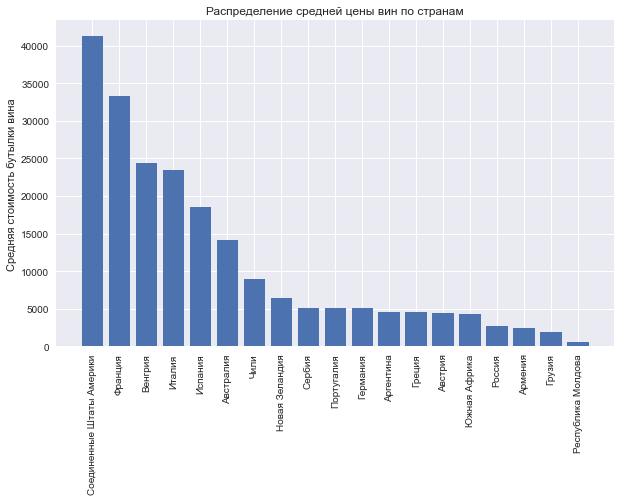

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(metrics_by_country.index, metrics_by_country['mean'])

ax.set_ylabel('Средняя стоимость бутылки вина')
ax.set_title('Распределение средней цены вин по странам')
plt.tick_params(axis='x', rotation=90)

plt.show()

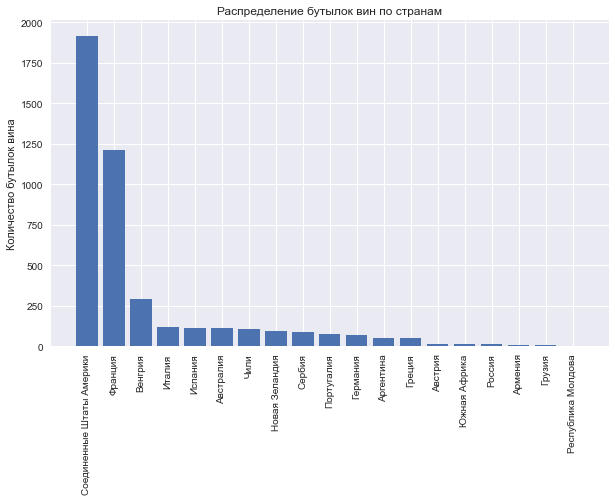

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(metrics_by_country.index, metrics_by_country['count'].sort_values(ascending=False))

ax.set_ylabel('Количество бутылок вина')
ax.set_title('Распределение бутылок вин по странам')
plt.tick_params(axis='x', rotation=90)

plt.show()

In [38]:
# различные показатели по дате производства вина
metrics_by_year = df.groupby(['year'])['base_price'].agg(['count', 'mean', 'median', 'std', 'min', 'max']
                                         ).round().sort_values('year')
metrics_by_year

,count,mean,median,std,min,max
year,,,,,,
1978.0,1,127990.0,127990.0,NaN,127990,127990
1982.0,1,386390.0,386390.0,NaN,386390,386390
1983.0,1,324990.0,324990.0,NaN,324990,324990
1984.0,1,310490.0,310490.0,NaN,310490,310490
1985.0,1,56990.0,56990.0,NaN,56990,56990
1986.0,1,59990.0,59990.0,NaN,59990,59990
1988.0,1,106250.0,106250.0,NaN,106250,106250
1989.0,3,148270.0,93830.0,111009.0,74990,275990
1990.0,2,224240.0,224240.0,121976.0,137990,310490


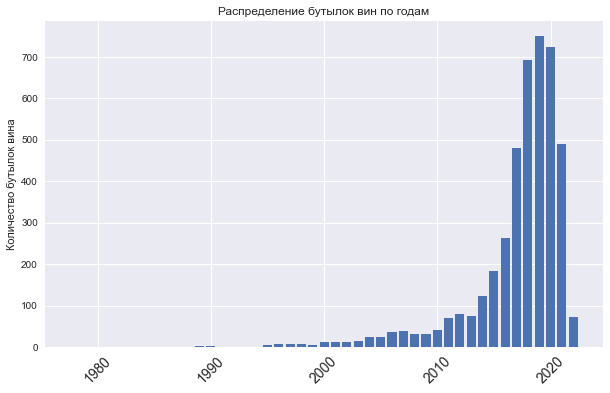

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(metrics_by_year.index, metrics_by_year['count'])

ax.set_ylabel('Количество бутылок вина')
ax.set_title('Распределение бутылок вин по годам')
ax.tick_params(axis='x', rotation=45, labelsize=14)

plt.show()

In [40]:
# различные показатели по цвету вина
metrics_by_color = df.groupby(['color'])['base_price'].agg(['count', 'mean', 'median', 'std', 'min', 'max']
                                         ).round().sort_values('color')
metrics_by_color

,count,mean,median,std,min,max
color,,,,,,
белое,1604,10980.0,4490.0,24064.0,340,374990
красное,2637,33861.0,9990.0,92961.0,340,1849990
розовое,116,3054.0,2140.0,4400.0,590,44990


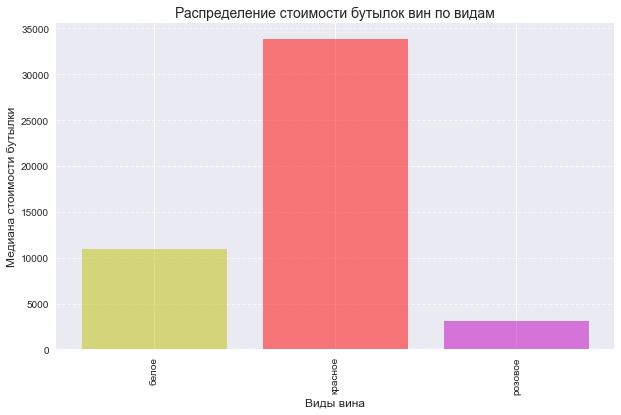

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["y", "r", "m"]
ax.bar(metrics_by_color.index, metrics_by_color['mean'], color=colors, alpha=0.5)

ax.set_ylabel('Медиана стоимости бутылки', fontsize=12)
ax.set_xlabel('Виды вина', fontsize=12)
ax.set_title('Распределение стоимости бутылок вин по видам', fontsize=14)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

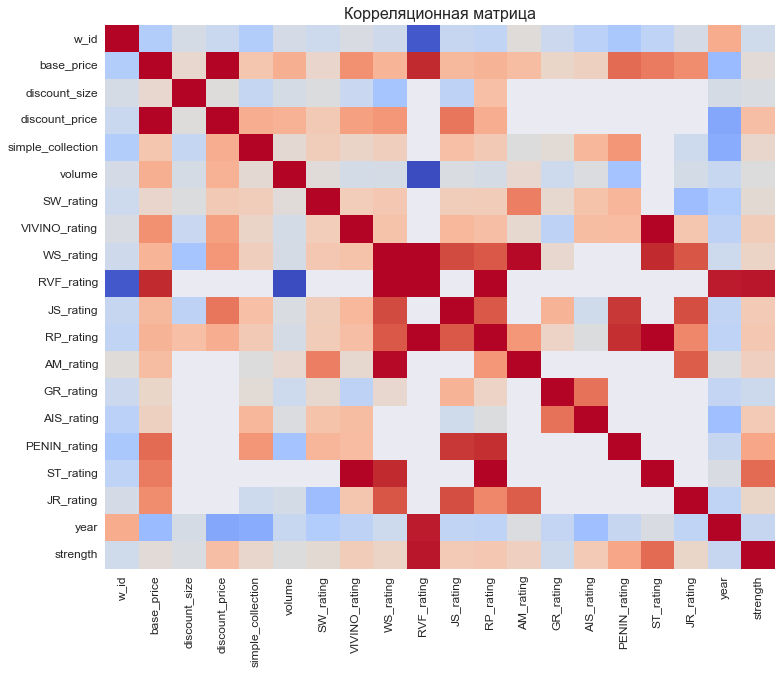

In [42]:
# Корреляционная матрица
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', cbar=False)
plt.title('Корреляционная матрица', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

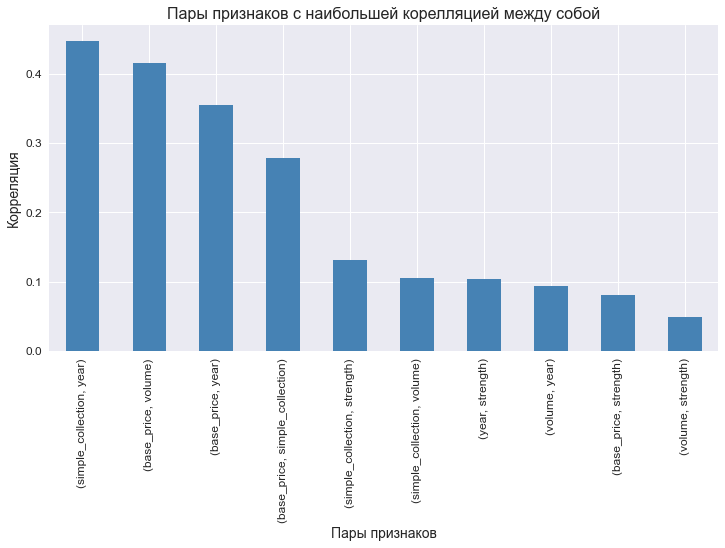

In [43]:
correlation_matrix = df[['name', 'base_price', 'simple_collection', 'country', 'color', 'sweetness', 'volume', 'grape', 'manufacturer', 'features', 'region',
       'year', 'strength', 'storage_potential', 'appellation', 'category',
       'decantation', 'aging_in_container', 'type']].corr().abs()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = correlation_matrix.mask(mask)

correlation_matrix = correlation_matrix[correlation_matrix != 1]
correlation_matrix = correlation_matrix.unstack().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar', color='steelblue')
plt.title('Пары признаков с наибольшей корелляцией между собой', fontsize=16)
plt.xlabel('Пары признаков', fontsize=14)
plt.ylabel('Корреляция', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Часть 3

## Анализ признаков и заполнение пропусков

In [44]:
df.isnull().sum()

name                     0
w_id                     0
href                     0
base_price               0
discount_size         3997
discount_price        3997
simple_collection        0
country                  0
color                   18
sweetness               31
volume                   9
SW_rating             1269
VIVINO_rating         2075
WS_rating             4030
RVF_rating            4372
JS_rating             3699
RP_rating             3687
AM_rating             4327
GR_rating             4325
AIS_rating            4339
PENIN_rating          4344
ST_rating             4370
JR_rating             4327
grape                    1
manufacturer             1
features              3584
region                  11
year                    55
strength                 6
storage_potential       25
appellation            212
category               181
decantation            368
aging_in_container      15
type                     0
dtype: int64

In [45]:
df['volume'].value_counts()

0.750    3929
1.500     225
0.375     161
3.000      23
0.500      18
6.000       5
0.187       4
9.000       1
Name: volume, dtype: int64

In [46]:
df['volume'].fillna(df['volume'].mode()[0], inplace=True)

In [47]:
df['volume'].mode()[0]

0.75

In [48]:
df.iloc[:, 10:]

,volume,SW_rating,VIVINO_rating,WS_rating,RVF_rating,JS_rating,RP_rating,AM_rating,GR_rating,AIS_rating,...,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container,type
0,0.75,4.7,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Кастилия и Леон,2020.0,14.5,8-10 лет.,Ribera del Duero DO,Denominacion de Origen (DO),аэрация,Бочка,Вино
1,0.75,4.4,4.2,NaN,NaN,93.0,NaN,NaN,NaN,NaN,...,"['Greenselection', 'Органика']",Тоскана,2017.0,14.0,10-15 лет.,Toscana IGT,Indicazione Geografica Tipica (IGT),аэрация,Бочка,Вино
2,0.75,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Эстремадура,2021.0,13.0,3-4 года.,Ribera del Guadiana DO,Denominacion de Origen (DO),аэрация,Нейтральная Емкость,Вино
3,0.75,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Фриули-Венеция-Джулия,2021.0,13.5,2-3 года.,Friuli DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино
4,0.75,4.7,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,['GreenselectionSustainable'],Сицилия,2021.0,12.5,3-4 года.,Sicilia DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,0.75,4.6,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,['GreenselectionSustainable'],Венето,2021.0,12.0,2-3 года.,Delle Venezie DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино
5653,0.75,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Юго-Запад,2018.0,13.5,7-10 лет.,Fronton AOC,Appellation d'Origine Controlee (AOC),не рекомендуется,Бочка,Вино
5654,0.75,4.3,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,['GreenselectionSustainable'],Центральная Долина,2020.0,13.5,5-8 лет.,Valle de Colchagua,Denominacion de Origen (DO),аэрация,Бочка,Вино
5655,0.75,5.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Южная Австралия,2018.0,14.5,7-10 лет.,McLaren Vale,NaN,аэрация,Бочка,Вино


In [49]:
df[[]].fillna(df['volume'].mode()[0], inplace=True)

/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [50]:
df['JR_rating'].unique()

array([ nan, 18.5, 17.5, 17. , 18. , 19. , 16. , 16.5, 15. ])

In [51]:
df['SW_rating'].value_counts()

5.0    1216
4.5     326
4.7     254
4.8     253
4.6     220
4.0     209
4.3     141
4.4     139
4.9     129
4.2      46
3.0      46
4.1      38
3.5      28
3.7      25
3.8      15
3.9       9
3.3       5
2.3       3
3.2       2
2.8       1
3.4       1
Name: SW_rating, dtype: int64

In [52]:
df['features'].value_counts()

['GreenselectionSustainable']        229
['Greenselection', 'Органика']       220
['Greenselection', 'Биодинамика']    179
['Веганское']                         81
['Натуральное']                       48
['Натуральное', 'Оранжевое']          15
['Оранжевое']                         11
[]                                     8
Name: features, dtype: int64

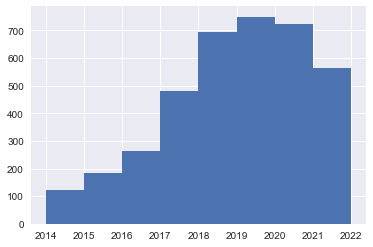

In [53]:
import matplotlib.pyplot as plt
plt.hist(df[df['year'] >= 2014]['year'], bins = 8)
plt.show()

In [54]:
df['appellation'].value_counts().head(10)

Toscana IGT                    180
Margaux AOC                     91
Pauillac AOC                    80
Rioja DOCa                      78
Saint-Emilion Grand Cru AOC     72
Pessac-Leognan AOC              70
Bourgogne AOC                   70
Saint-Julien AOC                67
Chianti Classico DOCG           62
Barolo DOCG                     62
Name: appellation, dtype: int64

In [55]:
df['category'].value_counts()

Appellation d'Origine Controlee (AOC)                      1438
Denominazione di Origine Controllata (DOC)                  466
Indicazione Geografica Tipica (IGT)                         372
Denominazione di Origine Controllata e Garantita (DOCG)     313
Denominacion de Origen (DO)                                 279
American Viticultural Areas (AVA)                           100
Denominacion de Origen Calificada (DOCa)                     93
Wine of Origin (WO)                                          78
Защищенное географическое указание (ЗГУ)                     76
Australian Geographical Indications (GI)                     76
Indication Geographique Protegee (IGP)                       67
Qualitatswein                                                62
3-eme Grand Cru Classe                                       58
Appellation d’Origine Protegee (AOP)                         56
2-eme Grand Cru Classe                                       52
1-er Grand Cru Classe                   

In [56]:
df['decantation'].value_counts()

аэрация             1988
не рекомендуется    1571
декантация           448
Name: decantation, dtype: int64

In [57]:
df['simple_collection'].value_counts() # оставим этот столбец, поскольку многовероятно, что от него зависит стоимость вина

False    2651
True     1724
Name: simple_collection, dtype: int64

In [58]:
df[['base_price', 'simple_collection']].corr() # корреляция небольшая, но пока оставим

,base_price,simple_collection
base_price,1.000000,0.277868
simple_collection,0.277868,1.000000


In [59]:
df['country'].value_counts() # больше всего французских вин

Франция                      1916
Италия                       1212
Испания                       295
Чили                          118
Германия                      115
Россия                        114
Соединенные Штаты Америки     105
Австрия                        97
Австралия                      88
Южная Африка                   78
Аргентина                      68
Грузия                         52
Новая Зеландия                 51
Венгрия                        15
Португалия                     15
Армения                        14
Греция                         11
Республика Молдова             10
Сербия                          1
Name: country, dtype: int64

In [60]:
df['color'].isna().sum() # то есть у 18 бутылок не спарсился цвет вина

18

In [61]:
df[df['color'].isna()].head()

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container,type
17,"Вино безалкогольное Domaine de la Prade Blanc,...",127400,/catalog/product/oddbird_domaine_de_la_prade_b...,2140,35.0,1391.0,False,Франция,NaN,NaN,...,[],Лангедок-Руссильон,NaN,NaN,1-2 года.,NaN,NaN,не рекомендуется,Нейтральная Емкость,Вино
25,"Вино безалкогольное Hans Baer Riesling, Low Al...",128582,/catalog/product/wine_dealcoholized_white_hans...,990,NaN,NaN,False,Германия,NaN,NaN,...,[],Рейнгессен,NaN,0.5,2-3 года.,Rheinhessen,Tafelwein,NaN,Нейтральная Емкость,Вино
29,"Вино Jean-Pierre Moueix Bordeaux,2016 г",120335,/catalog/product/jean_pierre_moueix_jean_pierr...,3160,NaN,NaN,False,Франция,NaN,NaN,...,NaN,Бордо,NaN,13.5,3-5 лет.,Bordeaux AOC,Appellation d'Origine Controlee (AOC),NaN,Нейтральная Емкость,Вино
360,"Вино Ratafia de Champagne, Geoffroy, 0.5л.",138676,/catalog/product/geoffroy_ratafia_de_champagne...,6990,NaN,NaN,False,Франция,NaN,NaN,...,['GreenselectionSustainable'],Шампань,NaN,18.0,10-15 лет.,Ratafia de Champagne AOC,Appellation d'Origine Controlee (AOC),NaN,Нейтральная Емкость,Вино
1111,"Вино Hans Baer Gluhwein Dornfelder, Weinkeller...",139712,/catalog/product/hans_baer_gluhwein_dornfelder...,990,NaN,NaN,False,Германия,NaN,NaN,...,NaN,Пфальц,2021.0,11.5,NaN,NaN,NaN,NaN,Нет,Вино


In [62]:
df['href'][17]

'/catalog/product/oddbird_domaine_de_la_prade_blanc_no_alcohol__075_127400/'

In [63]:
net_color = df[df['color'].isna()]

In [64]:
net_color['base_price'].mean() # это средняя цена бутылки вина, у которых не опредлён их цвет

2560.5555555555557

In [65]:
net_color['base_price'].sort_values(ascending=False).head(10)

2342    9990
360     6990
1510    4330
1509    3850
29      3160
1302    2490
17      2140
2157    2140
1468    1690
5438    1490
Name: base_price, dtype: int64

In [66]:
# избежим выбросов => используем 95% квантиль
quantile_95 = net_color['base_price'].quantile(0.95)

In [67]:
net_color.loc[df['base_price'] <= quantile_95, 'base_price'].mean() 
# средняя цена бутылки вина, у которых не опредлён цвет, с 95% квантилем

2123.529411764706

In [68]:
df['base_price'].mean() # средняя цена бутылки всей выборки

24526.358857142855

In [69]:
# избежим выбросов => используем 95% квантиль
quantile_95_for_all = df['base_price'].quantile(0.95)

In [70]:
df.loc[df['base_price'] <= quantile_95_for_all, 'base_price'].mean() 
# средняя цена бутылки вина для всей выборки с 95% квантилем

12975.264296011534

In [71]:
df.head()

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container,type
0,"Вино Hito, Bodegas Cepa 21, 2020г.",133241,/catalog/product/bodegas_cepa_21_hito_2020_075...,2690,NaN,NaN,False,Испания,красное,сухое,...,NaN,Кастилия и Леон,2020.0,14.5,8-10 лет.,Ribera del Duero DO,Denominacion de Origen (DO),аэрация,Бочка,Вино
1,"Вино Sassi Chiusi, Bertinga, 2017г.",138778,/catalog/product/bertinga_sassi_chiusi_2017_07...,4290,NaN,NaN,False,Италия,красное,сухое,...,"['Greenselection', 'Органика']",Тоскана,2017.0,14.0,10-15 лет.,Toscana IGT,Indicazione Geografica Tipica (IGT),аэрация,Бочка,Вино
2,"Вино Tempranillo Art Collection, Gurpegui, 2021г.",137398,/catalog/product/gurpegui_tempranillo_art_coll...,890,NaN,NaN,False,Испания,красное,сухое,...,NaN,Эстремадура,2021.0,13.0,3-4 года.,Ribera del Guadiana DO,Denominacion de Origen (DO),аэрация,Нейтральная Емкость,Вино
3,"Вино Priara Pinot Grigio, Pradio, 2021г.",137991,/catalog/product/pradio_priara_pinot_grigio__2...,1990,NaN,NaN,False,Италия,белое,сухое,...,NaN,Фриули-Венеция-Джулия,2021.0,13.5,2-3 года.,Friuli DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино
4,"Вино Tenuta Regaleali Bianco, Tasca d'Almerita...",137078,/catalog/product/conte_tasca_d_almerita_tenuta...,1990,30.0,1393.0,False,Италия,белое,сухое,...,['GreenselectionSustainable'],Сицилия,2021.0,12.5,3-4 года.,Sicilia DOC,Denominazione di Origine Controllata (DOC),не рекомендуется,Нейтральная Емкость,Вино


In [72]:
df['color'].isnull().sum()

18

In [73]:
net_color = df[df['color'].isna()]

In [74]:
net_color['base_price'].mean() # это средняя цена бутылки вина, у которых не опредлён их цвет

2560.5555555555557

In [75]:
df['base_price'].mean()

24526.358857142855

In [76]:
df[df['color'].isna()]

,name,w_id,href,base_price,discount_size,discount_price,simple_collection,country,color,sweetness,...,features,region,year,strength,storage_potential,appellation,category,decantation,aging_in_container,type
17,"Вино безалкогольное Domaine de la Prade Blanc,...",127400,/catalog/product/oddbird_domaine_de_la_prade_b...,2140,35.0,1391.0,False,Франция,NaN,NaN,...,[],Лангедок-Руссильон,NaN,NaN,1-2 года.,NaN,NaN,не рекомендуется,Нейтральная Емкость,Вино
25,"Вино безалкогольное Hans Baer Riesling, Low Al...",128582,/catalog/product/wine_dealcoholized_white_hans...,990,NaN,NaN,False,Германия,NaN,NaN,...,[],Рейнгессен,NaN,0.5,2-3 года.,Rheinhessen,Tafelwein,NaN,Нейтральная Емкость,Вино
29,"Вино Jean-Pierre Moueix Bordeaux,2016 г",120335,/catalog/product/jean_pierre_moueix_jean_pierr...,3160,NaN,NaN,False,Франция,NaN,NaN,...,NaN,Бордо,NaN,13.5,3-5 лет.,Bordeaux AOC,Appellation d'Origine Controlee (AOC),NaN,Нейтральная Емкость,Вино
360,"Вино Ratafia de Champagne, Geoffroy, 0.5л.",138676,/catalog/product/geoffroy_ratafia_de_champagne...,6990,NaN,NaN,False,Франция,NaN,NaN,...,['GreenselectionSustainable'],Шампань,NaN,18.0,10-15 лет.,Ratafia de Champagne AOC,Appellation d'Origine Controlee (AOC),NaN,Нейтральная Емкость,Вино
1111,"Вино Hans Baer Gluhwein Dornfelder, Weinkeller...",139712,/catalog/product/hans_baer_gluhwein_dornfelder...,990,NaN,NaN,False,Германия,NaN,NaN,...,NaN,Пфальц,2021.0,11.5,NaN,NaN,NaN,NaN,Нет,Вино
1302,"Вино Петрикор красное, Шумринка",140053,/catalog/product/nabor_petrikor_krasnoe_v_p_u_...,2490,NaN,NaN,False,Россия,NaN,сухое,...,NaN,Кубань,NaN,NaN,5-7 лет.,ЗГУ Кубань. Анапа,Защищенное географическое указание (ЗГУ),декантация,Бочка,Вино
1468,"Вино Libalis Frizz, Maetierra",141065,/catalog/product/libalis_frizz_075_gift_141065/,1690,NaN,NaN,False,Испания,NaN,NaN,...,['Веганское'],Риоха,NaN,5.5,3-5 лет.,Valles de Sadaci PGI,Indicacion geografica protegida (IGP),NaN,Нейтральная Емкость,Вино
1509,"Вино Clarendelle by Haut-Brion Rouge, Domaine ...",141346,/catalog/product/clarendelle_by_haut_brion_rou...,3850,NaN,NaN,False,Франция,NaN,сухое,...,NaN,Бордо,NaN,NaN,5-10 лет.,Bordeaux AOC,Appellation d'Origine Controlee (AOC),аэрация,Бочка,Вино
1510,"Вино Clarendelle by Haut-Brion Medoc, Domaine ...",141347,/catalog/product/clarendelle_by_haut_brion_med...,4330,NaN,NaN,False,Франция,NaN,сухое,...,NaN,Бордо,NaN,NaN,5-10 лет.,Medoc AOC,Appellation d'Origine Controlee (AOC),NaN,Бочка,Вино
1934,"Вино Libalis Frizz, Maetierra",139853,/catalog/product/libalis_frizz_075_139853/,1390,30.0,973.0,False,Испания,NaN,сухое,...,['Веганское'],Риоха,NaN,5.5,3-5 лет,Valles de Sadaci PGI,Indicacion geografica protegida (IGP),NaN,Нейтральная Емкость,Вино


In [79]:
df['href'][17]

'/catalog/product/oddbird_domaine_de_la_prade_blanc_no_alcohol__075_127400/'

In [80]:
df.loc[17, 'color'] = 'белое'

In [81]:
df['href'][25]

'/catalog/product/wine_dealcoholized_white_hans_baer_riesling_075_128582/'

In [82]:
df.loc[25, 'color'] = 'белое'

In [83]:
df['href'][29]

'/catalog/product/jean_pierre_moueix_jean_pierre_moueix_bordeaux/'

In [84]:
df.loc[29, 'color'] = 'красное'

In [85]:
df['href'][360]

'/catalog/product/geoffroy_ratafia_de_champagne_05_138676/'

In [86]:
df.loc[360, 'color'] = 'красное'

In [87]:
df['href'][1111]

'/catalog/product/hans_baer_gluhwein_dornfelder_2021_075_139712/'

In [88]:
df.loc[1111, 'color'] = 'красное'

In [89]:
df['href'][1302]

'/catalog/product/nabor_petrikor_krasnoe_v_p_u_075_gift_140053/'

In [90]:
df.loc[1302, 'color'] = 'красное'

In [92]:
df[df['color'].isna()]['w_id'].unique()

array([141065, 141346, 141347, 139853, 127394, 140555, 122110, 122111,
       129557, 129490, 132842, 134706])